In [1]:
from tensorflow.keras.models import load_model, Model

# Load the saved SimCLR contrastive model
saved_contrastive_model_path = r"C:\Users\shaif\Downloads\contrastive_model_penn20.h5"
contrastive_model = load_model(saved_contrastive_model_path, compile=False)

# Extract the ResNet50 layer
resnet50_layer = contrastive_model.get_layer("resnet50")

# Create a new input layer
new_input = tf.keras.Input(shape=(224, 224, 3))

# Use the ResNet50 layer directly on the new input
resnet_output = resnet50_layer(new_input)

# Build a new encoder model
encoder = Model(inputs=new_input, outputs=resnet_output)

print("Standalone encoder model created successfully.")
encoder.summary()


NameError: name 'tf' is not defined

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
import json
import glob
import random
import collections
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
from sklearn.utils import shuffle

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import shutil
import keras
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import keras
import json
import tensorflow as tf 
from keras.layers import Input
from keras import Sequential
from keras.layers import Dense, LSTM,Flatten, TimeDistributed, Conv2D, Dropout
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from keras.models import load_model
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D,Reshape, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten, UpSampling2D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K


AUTO = tf.data.AUTOTUNE
BATCH_SIZE = 32
EPOCHS = 50
CROP_TO = 32
SEED = 26

PROJECT_DIM = 128
LATENT_DIM = 512
WEIGHT_DECAY = 0.0005
learning_rate = 0.0001
batch_size = 32
hidden_units = 512
projection_units = 256
num_epochs = 2
dropout_rate = 0.5

temperature = 0.05

def get_f1(y_true, y_pred): #taken from old keras source code
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    tn = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1-y_true) * (y_pred), 0, 1)))
    fn = K.sum(K.round(K.clip((y_true) * (1-y_pred), 0, 1)))
    

    f1_val = tp / ( tp + ( (1/2) * (fp+fn) ) + K.epsilon())
    return f1_val

from glob import glob
trn='D:/D-Video/PennA/Penn_Action/*/'
tr= glob(trn)

len(tr)



import tensorflow as tf

# Explicitly set device to CPU
#tf.config.set_visible_devices([], 'GPU')

# Now TensorFlow will use CPU instead of GPU

label = 0
XT = []
YT = []
for i in tr:

    lst = glob(i+"/*")
    
    for j in lst:
        imgs = glob(j+"/*")
        #print(np.shape(imgs))
        XT.append(imgs)
        YT.append(label)
    
    label=label+1

print( len(XT), len(YT), np.shape(XT[0]) , YT[0] )

i = 1
x = glob(tr[i]+'/*/')
vid = glob(x[i] +'/*')
vid[:2]


from PIL import Image
import numpy as np

def resize_images(q):
    img = Image.fromarray(q)
    resized_img = img.resize((56,56), Image.ANTIALIAS)
    return resized_img

def generate_and_sort(n):
    unique_numbers = set()
    while len(unique_numbers) < 16:
        unique_numbers.add(random.randint(0, n))
    sorted_numbers = sorted(unique_numbers)
    return sorted_numbers


def prepare_videoes(image_paths):
    images = []
    
    for path in image_paths:
        # Load image
        img = Image.open(path)
        
        # Convert to RGB if not already
        if img.mode != 'RGB':
            img = img.convert('RGB')
        
        # Resize the image
        img = img.resize((56,56), Image.ANTIALIAS)
        
        # Convert to numpy array
        img_array = np.array(img)
        
        # Append the processed image to the list
        images.append(img_array)
    
    n = np.shape(images)[0] - 1
    sortn = generate_and_sort(n)
    #print(sortn)
    img_parts = [images[i] for i in sortn]
    #print(np.shape(img_parts))
    
    combined_image = np.zeros((224, 224, 3), dtype=np.uint8)
    
    for i, img_part in enumerate(img_parts):
        row = i // 4
        col = i % 4
        combined_image[row*56:(row+1)*56, col*56:(col+1)*56, :] = img_part
        
    return combined_image

combined_image = prepare_videoes(vid)
print("Combined image shape:", combined_image.shape)

q =  Image.fromarray(combined_image)
resized_image = q.resize((560,560), Image.ANTIALIAS)
# Display the resized image using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(resized_image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

2326 2326 (151,) 0


C:\Users\shaif\AppData\Local\Temp\ipykernel_4488\1326720206.py:181: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((56,56), Image.ANTIALIAS)


In [4]:
np.shape(q)

(224, 224, 3)

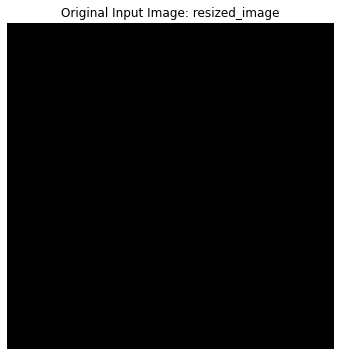

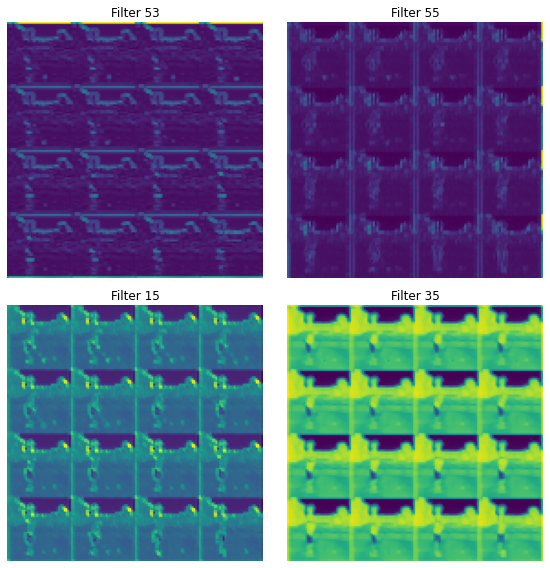

Saved activation plot to: C:\Users\shaif\Downloads\filter_activations.png


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
import random
import os

# Normalize and batch the image
resized_image = np.array(resized_image).astype(np.float32) / 255.0
q_batch = np.expand_dims(resized_image, axis=0)

# Use ResNet50 backbone
resnet = contrastive_model.get_layer("resnet50")

# Pick an intermediate layer to visualize
layer_index = 5
layer_outputs = [layer.output for layer in resnet.layers[1:layer_index + 2]]
activation_model = Model(inputs=resnet.input, outputs=layer_outputs)

# Get activations
activations = activation_model.predict(q_batch)
act = activations[-1][0]  # shape: (H, W, C)

# Filter out flat filters
threshold = 1e-5
valid_indices = [i for i in range(act.shape[-1]) if np.max(act[..., i]) - np.min(act[..., i]) > threshold]

# Randomly choose 4 non-flat filters
selected = random.sample(valid_indices, min(4, len(valid_indices)))

# Step 1: Plot the original image
plt.figure(figsize=(6, 6))
plt.imshow(resized_image)
plt.axis('off')
plt.title("Original Input Image: resized_image")
plt.show()

# Step 2: Create a square block layout for the 4 activations
n_filters = len(selected)
n_cols = int(np.ceil(np.sqrt(n_filters)))
n_rows = int(np.ceil(n_filters / n_cols))

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))

for idx, i in enumerate(selected):
    r, c = divmod(idx, n_cols)
    axs[r, c].imshow(act[..., i], cmap='viridis')
    axs[r, c].axis('off')
    axs[r, c].set_title(f'Filter {i}')
    
# Hide unused subplots if any
for i in range(n_filters, n_rows * n_cols):
    r, c = divmod(i, n_cols)
    axs[r, c].axis('off')

plt.tight_layout()

# Save to disk
save_path = r"C:\Users\shaif\Downloads\filter_activations.png"
plt.savefig(save_path)
plt.show()

print(f"Saved activation plot to: {save_path}")


C:\Users\shaif\AppData\Local\Temp\ipykernel_9304\2564031163.py:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_image = q.resize((560, 560), Image.ANTIALIAS)


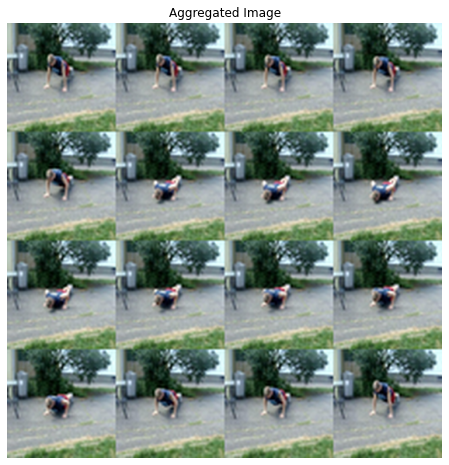

Image saved to: C:\Users\shaif\Downloads\resized_image.png


In [20]:
from PIL import Image
import matplotlib.pyplot as plt

# Create image from array and resize
q = Image.fromarray(combined_image)
resized_image = q.resize((560, 560), Image.ANTIALIAS)

# Save the image
save_path = r"C:\Users\shaif\Downloads\resized_image.png"
resized_image.save(save_path)

# Optionally, display the resized image
plt.figure(figsize=(10, 8))
plt.imshow(resized_image)
plt.axis('off')
plt.title("Aggregated Image")
plt.show()

print(f"Image saved to: {save_path}")
